In [1]:
# Importing datasets
from keras.datasets import mnist
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-22 19:21:01.542696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-22 19:21:01.543173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


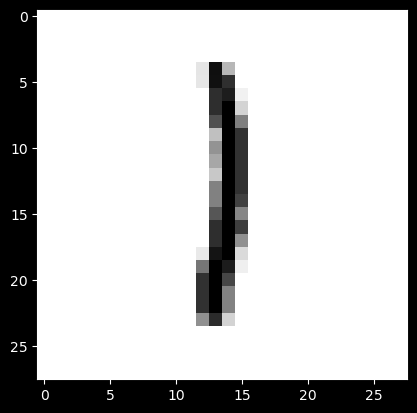

In [3]:
# View Images(Optional)
import matplotlib.pyplot as plt

digit = train_images[72]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
# Compile model function
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",  # aka acc
)

In [5]:
# Preparing data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
# This is where machine learning starts!
tf.compat.v1.enable_eager_execution()
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-01-22 19:21:31.806626: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-22 19:21:32.198140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 9ms/step - loss: 0.2605 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1045 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0373 - accuracy: 0.9887


In [7]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

print(predictions[0])

1/1 [==============================] - 0s 113ms/step
[6.6826505e-10 1.6929079e-10 4.1789149e-06 5.3090007e-05 1.3414339e-12
 1.0144445e-08 1.0969593e-13 9.9994218e-01 6.7219574e-08 4.0822769e-07]


2022-12-30 20:47:08.026845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

 25/313 [=>............................] - ETA: 1s - loss: 0.0776 - accuracy: 0.9775

2022-12-30 20:47:10.903800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9789
test_acc: 0.9789000749588013


In [9]:
batch = train_images[128:256]